# Application of Zipf's law on H. G. Wells' The Time Machine dataset

In [1]:
# Modified from
# https://github.com/d2l-ai/d2l-en/blob/master/chapter_recurrent-neural-networks/lang-model.md
# D2L sec 8.2

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled
import collections
import re
import os

try:
    import requests
except:
    %pip install -qq requests
    import requests

In [2]:
latexify(width_scale_factor=1.70, fig_height=2)

/home/madhav/.local/lib/python3.8/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [3]:
webdata = True

if webdata:
    url = "https://raw.githubusercontent.com/probml/probml-data/main/data/timemachine.txt"
    response = requests.get(url)
    data = response.text
    lines = [s + "\n" for s in response.text.split("\n")]
else:
    data_dir = "../data"
    fname = os.path.join(data_dir, "timemachine.txt")
    with open(fname, "r") as f:
        lines = f.readlines()

raw_dataset = [re.sub("[^A-Za-z]+", " ", st).lower().split() for st in lines]

# Print first few lines
for sentence in raw_dataset[:10]:
    print(sentence)
"""
['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 'a', 'lean', 'forefinger', 'as', 'we', 'sat', 'and', 'lazily', 'admired', 'his', 'earnestness', 'over', 'this', 'new', 'paradox', 'as', 'we', 'thought', 'it', 'and', 'his', 'fecundity']
[]
['you', 'must', 'follow', 'me', 'carefully', 'i', 'shall', 'have', 'to', 'controvert', 'one', 'or', 'two', 'ideas', 'that', 'are', 'almost', 'universally', 'accepted', 'the', 'geometry', 'for', 'instance', 'they', 'taught', 'you', 'at', 'school', 'is', 'founded', 'on', 'a', 'misconception']
[]
['is', 'not', 'that', 'rather', 'a', 'large', 'thing', 'to', 'expect', 'us', 'to', 'begin', 'upon', 'said', 'filby', 'an', 'argumentative', 'person', 'with', 'red', 'hair']
[]
"""

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 

"\n['the', 'time', 'machine', 'by', 'h', 'g', 'wells']\n[]\n['i']\n[]\n['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', '

In [4]:
# Unigrams
words = [word for sentence in raw_dataset for word in sentence]
print("First 10 unigrams\n", words[:10])

# Bigrams
word_pairs = [pair for pair in zip(words[:-1], words[1:])]
print("First 10 bigrams\n", word_pairs[:10])

# Trigrams
word_triples = [triple for triple in zip(words[:-2], words[1:-1], words[2:])]
print("First 10 trigrams\n", word_triples[:10])

# ngram statistics
counter = collections.Counter(words)
counter_pairs = collections.Counter(word_pairs)
counter_triples = collections.Counter(word_triples)

print("Most common unigrams\n", counter.most_common(10))
print("Most common bigrams\n", counter_pairs.most_common(10))
print("Most common trigrams\n", counter_triples.most_common(10))

wordcounts = jnp.array([count for _, count in counter.most_common()])
bigramcounts = jnp.array([count for _, count in counter_pairs.most_common()])
triplecounts = jnp.array([count for _, count in counter_triples.most_common()])


"""
First 10 unigrams
 ['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time']
First 10 bigrams
 [('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller')]
First 10 trigrams
 [('the', 'time', 'machine'), ('time', 'machine', 'by'), ('machine', 'by', 'h'), ('by', 'h', 'g'), ('h', 'g', 'wells'), ('g', 'wells', 'i'), ('wells', 'i', 'the'), ('i', 'the', 'time'), ('the', 'time', 'traveller'), ('time', 'traveller', 'for')]
Most common unigrams
 [('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]
Most common bigrams
 [(('of', 'the'), 309), (('in', 'the'), 169), (('i', 'had'), 130), (('i', 'was'), 112), (('and', 'the'), 109), (('the', 'time'), 102), (('it', 'was'), 99), (('to', 'the'), 85), (('as', 'i'), 78), (('of', 'a'), 73)]
Most common trigrams
 [(('the', 'time', 'traveller'), 59), (('the', 'time', 'machine'), 30), (('the', 'medical', 'man'), 24), (('it', 'seemed', 'to'), 16), (('it', 'was', 'a'), 15), (('here', 'and', 'there'), 15), (('seemed', 'to', 'me'), 14), (('i', 'did', 'not'), 14), (('i', 'saw', 'the'), 13), (('i', 'began', 'to'), 13)]
"""

First 10 unigrams
 ['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time']
First 10 bigrams
 [('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller')]
First 10 trigrams
 [('the', 'time', 'machine'), ('time', 'machine', 'by'), ('machine', 'by', 'h'), ('by', 'h', 'g'), ('h', 'g', 'wells'), ('g', 'wells', 'i'), ('wells', 'i', 'the'), ('i', 'the', 'time'), ('the', 'time', 'traveller'), ('time', 'traveller', 'for')]
Most common unigrams
 [('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]
Most common bigrams
 [(('of', 'the'), 309), (('in', 'the'), 169), (('i', 'had'), 130), (('i', 'was'), 112), (('and', 'the'), 109), (('the', 'time'), 102), (('it', 'was'), 99), (('to', 'the'), 85), (('as', 'i'), 78), (('of', 'a'), 73)]
Most common trigrams
 [(('the', 'time', 'traveller'), 59), (('t

"\nFirst 10 unigrams\n ['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time']\nFirst 10 bigrams\n [('the', 'time'), ('time', 'machine'), ('machine', 'by'), ('by', 'h'), ('h', 'g'), ('g', 'wells'), ('wells', 'i'), ('i', 'the'), ('the', 'time'), ('time', 'traveller')]\nFirst 10 trigrams\n [('the', 'time', 'machine'), ('time', 'machine', 'by'), ('machine', 'by', 'h'), ('by', 'h', 'g'), ('h', 'g', 'wells'), ('g', 'wells', 'i'), ('wells', 'i', 'the'), ('i', 'the', 'time'), ('the', 'time', 'traveller'), ('time', 'traveller', 'for')]\nMost common unigrams\n [('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]\nMost common bigrams\n [(('of', 'the'), 309), (('in', 'the'), 169), (('i', 'had'), 130), (('i', 'was'), 112), (('and', 'the'), 109), (('the', 'time'), 102), (('it', 'was'), 99), (('to', 'the'), 85), (('as', 'i'), 78), (('of', 'a'), 73)]\nMost common trigrams\n [(('the', 'time', 'travelle

/home/madhav/.local/lib/python3.8/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


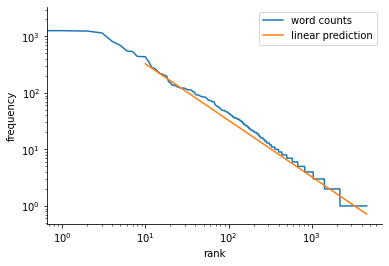

In [5]:
plt.figure()
plt.loglog(wordcounts, label="word counts")
plt.ylabel("frequency")
plt.xlabel("rank")
start_rank = 10.0
x = jnp.arange(start_rank, len(wordcounts))  # rank
total_words = jnp.sum(wordcounts)
kappa = 0.1
a = -1
y = kappa * jnp.power(x, a) * total_words  # predicted frequencey
plt.loglog(x, y, label="linear prediction")
plt.legend()
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savefig("timemachine-zipf-1")
plt.show()

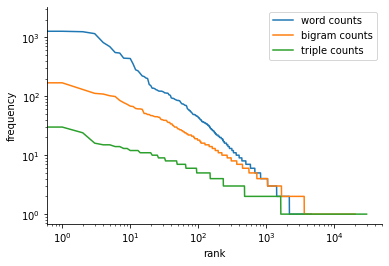

In [6]:
plt.figure()
plt.loglog(wordcounts, label="word counts")
plt.loglog(bigramcounts, label="bigram counts")
plt.loglog(triplecounts, label="triple counts")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("rank")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
savefig("timemachine-zipf-3")
plt.show()